<a href="https://colab.research.google.com/github/buildwithdemis/machinelearning/blob/main/ML_ch_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise: Train a simple linear regression model**

In this exercise, we'll train a simple linear regression model to predict body temperature based on dogs' ages and interpret the result.

**Loading data**

Let's begin by having a look at our data.

In [1]:
import pandas
!pip install statsmodels
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv

# Convert it into a table using pandas
dataset = pandas.read_csv("doggy-illness.csv", delimiter="\t")

# Print the data
print(dataset)

--2025-06-03 01:02:14--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/graphing.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21511 (21K) [text/plain]
Saving to: ‘graphing.py’

graphing.py         100%[===================>]  21.01K  --.-KB/s    in 0s      

2025-06-03 01:02:14 (87.3 MB/s) - ‘graphing.py’ saved [21511/21511]

--2025-06-03 01:02:14--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/doggy-illness.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, aw

We have a variety of information, including what the dogs did the night before, their age, whether they're overweight, and their clinical signs. In this exercise, our y values, or labels, are represented by the core_temperature column, while our feature will be the age in years.

**Data visualization**

Let's have a look at how the features and labels are distributed.

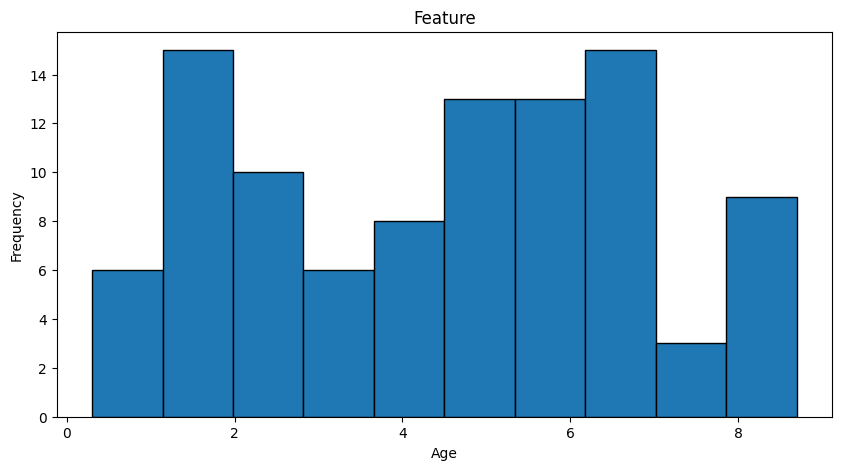

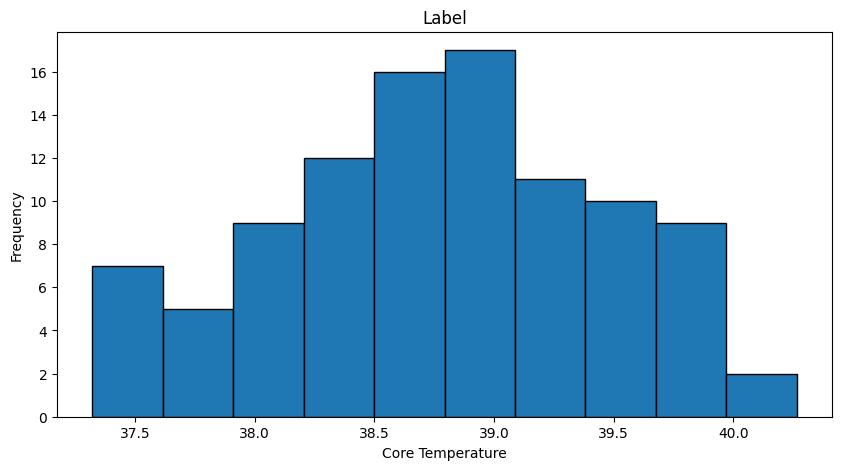

In [2]:
import matplotlib.pyplot as plt

# Histogram for 'age'
plt.figure(figsize=(10, 5))
plt.hist(dataset['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Feature')
plt.show()

# Histogram for 'core_temperature'
plt.figure(figsize=(10, 5))
plt.hist(dataset['core_temperature'], bins=10, edgecolor='black')
plt.xlabel('Core Temperature')
plt.ylabel('Frequency')
plt.title('Label')
plt.show()

Looking at our feature (age), we can see dogs were at or less than 9 years of age, and ages are evenly distributed. In other words, no particular age is substantially more common than any other.

Looking at our label (core_temperature), most dogs seem to have a slightly elevated core temperature (we would normally expect ~37.5 degrees celcius), which indicates they're unwell. A small number of dogs have a temperature above 40 degrees, which indicates they're quite unwell.

Simply because the shape of these distributions is different, we can guess that the feature won't be able to predict the label extremely well. For example, if old age perfectly predicted who would have a high temperature, then the number of old dogs would exactly match the number of dogs with a high temperature.

The model might still end up being useful, though, so lets continue.

The next step is to eyeball the relationship. Let's plot relation between the labels and features.

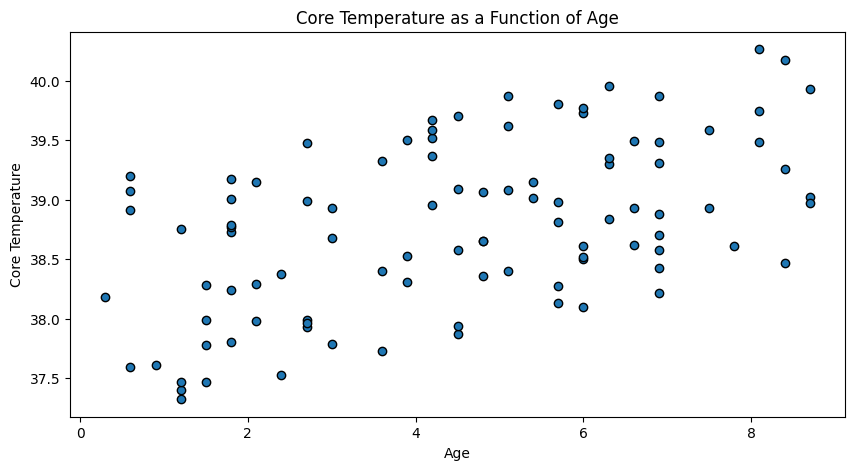

In [3]:
import matplotlib.pyplot as plt

# Scatter plot for 'age' vs 'core_temperature'
plt.figure(figsize=(10, 5))
plt.scatter(dataset['age'], dataset['core_temperature'], edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Core Temperature')
plt.title('Core Temperature as a Function of Age')
plt.show()

It does seem that older dogs tended to have higher temperatures than younger dogs. The relationship is quite "noisy," though; many dogs of the same age have quite different temperatures.

**Simple linear regression**

Let's formally examine the relationship between our labels and features by fitting a line (simple linear-regression model) to the dataset.

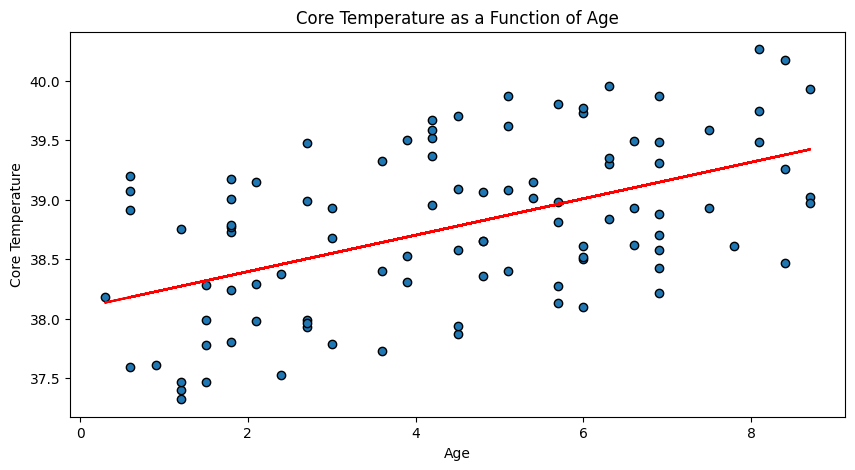

In [7]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# First, we define our formula using a special syntax
# This says that core temperature is explained by age
formula = "core_temperature ~ age"

# Perform linear regression. This method takes care of
# the entire fitting procedure for us.
model = smf.ols(formula = formula, data = dataset).fit()

# Show a graph of the result
plt.figure(figsize=(10, 5))
plt.scatter(dataset['age'], dataset['core_temperature'], edgecolor='black')

# Calculate the predicted values using the fitted model
predicted_temperature = model.predict(dataset['age'])

# Plot the regression line using the original age values and the predicted temperatures
plt.plot(dataset['age'], predicted_temperature, color='red')

#plt.plot(dataset['age'], model.params * dataset['age'] + model.params, color='red')
plt.xlabel('Age')
plt.ylabel('Core Temperature')
plt.title('Core Temperature as a Function of Age')
plt.show()

The line seems to fit the data quite well, validating our hypothesis that there's a positive correlation between a dog's age and their core temperature.

**Interpreting our model**

Visually, simple linear regression is easy to understand. Let's recap on what the parameters mean, though.

In [8]:
print("Intercept:", model.params[0], "Slope:", model.params[1])

Intercept: 38.087867548892085 Slope: 0.15333957754731864


<ipython-input-8-7aa9f0c6435e>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Intercept:", model.params[0], "Slope:", model.params[1])


Remember that simple linear regression models are explained by the line intercept and the line slope.

Here, our intercept is 38 degrees celsius. This means that when age is 0, the model will predict 38 degrees.

Our slope is 0.15 degrees celsius, meaning that for every year of age, the model will predict temperatures 0.15 degrees higher.

In the following box, try to change the age to a few different values to see different predictions, and compare these with the line in the preceding graph.

In [9]:
def estimate_temperature(age):
    # Model param[0] is the intercepts and param[1] is the slope
    return age * model.params[1] + model.params[0]

print("Estimate temperature from age")
print(estimate_temperature(age=0))

Estimate temperature from age
38.087867548892085


<ipython-input-9-0bf4afbf0dce>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return age * model.params[1] + model.params[0]


**Summary**

We covered the following concepts in this exercise:

*   Quickly visualizing a dataset
*   Qualitatively assessing a linear relationship
*   Building a simple linear-regression model
*   Understanding parameters of a simple linear-regression model


